In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas_pipeline_classes import helper, preprocessing as ppc, feature_engineering as fe, utils
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.preprocessing import Imputer, StandardScaler
%matplotlib inline

In [2]:
houses = pd.read_csv('houses.csv')

In [3]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [289]:
catPipe = Pipeline([
    ('selectCat', utils.DFTransform(lambda df: df.select_dtypes(include=[object]))),
    ('dropNull', ppc.DropTooManyNulls()),
    ('fillNa', utils.DFTransform(lambda df: df.fillna('NaN'))),
    ('OneHot', ppc.DFDummyTransformer())
])

In [290]:
numPipe = Pipeline([
    ('selectCat', utils.DFTransform(lambda df: df.select_dtypes(exclude=[object]))),
    ('dropNull', ppc.DropTooManyNulls()),
    ('fillNa', ppc.DFImputer(imputer=Imputer(strategy='median'))),
])

In [291]:
pipe = Pipeline([
    ('parallel', ppc.DFFeatureUnion([('numPipe', numPipe), ('catPipe', catPipe)])),
#    ('scaler', ppc.DFScaler(scaler=StandardScaler()))
])

In [304]:
features= houses.drop(['SalePrice'],axis=1)
target = houses['SalePrice']

In [305]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [306]:
X_train_prep = pipe.fit_transform(X_train)

In [307]:
X_test_prep = pipe.transform(X_test)

In [308]:
#X_train_prep = sm.add_constant(X_train_prep)
#X_test_prep = sm.add_constant(X_test_prep)
X_train_prep['const'] = 1
X_test_prep['const'] = 1

In [309]:
len(X_train_prep)

1168

In [310]:
len(y_train)

1168

In [355]:
glm = smf.GLM(y_train, X_train_prep, family=sm.families.Gamma(link=sm.families.links.identity)).fit()

/home/jodahr/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:244: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  DomainWarning)


In [356]:
summary2 = glm.summary2()
summary2

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Generalized linear model
=======================================================================================
Model:                      GLM                      AIC:                    26367.1774
Link Function:              identity                 BIC:                    -6600.7363
Dependent Variable:         SalePrice                Log-Likelihood:         -12952.   
Date:                       2018-02-10 19:29         LL-Null:                -21692.   
No. Observations:           1168                     Deviance:               10.277    
Df Model:                   231                      Pearson chi2:           9.88      
Df Residuals:               936                      Scale:                  0.010551  
Method:                     IRLS                                                       
---------------------------------------------------------------------------------------
                         Coef.      Std.Err.     z     P>|z|     [0.025       0.975]   
---------------------------------------------------------------------------------------
Id                         -1.4318     1.1992  -1.1940 0.2325      -3.7821       0.9186
MSSubClass                -32.0187    57.0300  -0.5614 0.5745    -143.7954      79.7580
LotArea                     0.6653     0.1087   6.1225 0.0000       0.4523       0.8783
OverallQual              6428.5419   774.9782   8.2951 0.0000    4909.6125    7947.4713
OverallCond              4081.2170   621.9698   6.5618 0.0000    2862.1786    5300.2554
YearBuilt                 278.2376    53.1277   5.2372 0.0000     174.1093     382.3659
YearRemodAdd              121.2897    38.6814   3.1356 0.0017      45.4755     197.1039
MasVnrArea                 10.8768     5.8695   1.8531 0.0639      -0.6271      22.3808
BsmtFinSF1                 14.0277     2.5772   5.4430 0.0000       8.9765      19.0789
BsmtFinSF2                  5.8435     5.0270   1.1624 0.2451      -4.0093      15.6962
BsmtUnfSF                   0.5163     2.3079   0.2237 0.8230      -4.0071       5.0397
TotalBsmtSF                20.3874     3.1658   6.4398 0.0000      14.1825      26.5924
1stFlrSF                    4.9640     4.6914   1.0581 0.2900      -4.2309      14.1590
2ndFlrSF                   22.3818     4.0873   5.4759 0.0000      14.3708      30.3929
LowQualFinSF                3.0809     9.0155   0.3417 0.7326     -14.5891      20.7509
GrLivArea                  30.4268     4.1663   7.3032 0.0000      22.2611      38.5925
BsmtFullBath             1248.9171  1553.9213   0.8037 0.4216   -1796.7127    4294.5470
BsmtHalfBath             -692.4485  2397.6654  -0.2888 0.7727   -5391.7864    4006.8894
FullBath                 2556.1659  1822.3910   1.4026 0.1607   -1015.6548    6127.9866
HalfBath                 2109.1430  1687.2165   1.2501 0.2113   -1197.7406    5416.0266
BedroomAbvGr            -3027.0911  1121.8017  -2.6984 0.0070   -5225.7822    -828.4001
KitchenAbvGr            -6501.3054  4473.7973  -1.4532 0.1462  -15269.7869    2267.1761
TotRmsAbvGrd             1541.2396   796.5824   1.9348 0.0530     -20.0333    3102.5124
Fireplaces               4047.8689  1130.8375   3.5795 0.0003    1831.4682    6264.2696
GarageYrBlt               -41.5241    44.3601  -0.9361 0.3492    -128.4684      45.4202
GarageCars               4569.4597  1842.4324   2.4801 0.0131     958.3586    8180.5607
GarageArea                 15.6464     7.2223   2.1664 0.0303       1.4910      29.8017
WoodDeckSF                 12.1775     5.1958   2.3437 0.0191       1.9939      22.3611
OpenPorchSF                 8.3470     8.3239   1.0028 0.3160      -7.9675      24.6615
EnclosedPorch              23.8286     9.3628   2.5450 0.0109       5.4778      42.1794
3SsnPorch                  27.1576    23.3272   1.1642 0.2443     -18.5628      72.8780
ScreenPorch                37.7091    11.0395   3.4158 0.0006      16.0720      59.3462
PoolArea          

In [357]:
glm.tvalues.sort_values(ascending=False)

OverallQual              8.295126
GrLivArea                7.303157
OverallCond              6.561761
TotalBsmtSF              6.439809
LotArea                  6.122480
2ndFlrSF                 5.475914
BsmtFinSF1               5.443016
YearBuilt                5.237152
RoofMatl=WdShngl         3.947661
RoofMatl=Membran         3.633108
Fireplaces               3.579532
Neighborhood=NoRidge     3.475537
ScreenPorch              3.415820
YearRemodAdd             3.135607
Neighborhood=StoneBr     2.988454
RoofMatl=CompShg         2.751224
RoofMatl=Metal           2.696228
EnclosedPorch            2.545023
Neighborhood=NridgHt     2.539906
RoofMatl=Tar&Grv         2.539333
GarageCars               2.480123
Neighborhood=Crawfor     2.394990
WoodDeckSF               2.343722
GarageArea               2.166413
TotRmsAbvGrd             1.934815
MasVnrArea               1.853119
RoofMatl=WdShake         1.852271
Condition2=PosA          1.847231
GarageQual=Ex            1.721054
FullBath      

In [336]:
glm.plot_partial_residuals

<bound method GLMResults.plot_partial_residuals of <statsmodels.genmod.generalized_linear_model.GLMResults object at 0x7fd27d0d7b70>>

In [313]:
X_test_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 553 to 640
Columns: 278 entries, Id to const
dtypes: float64(277), int64(1)
memory usage: 646.5 KB


In [314]:
X_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 362 to 570
Columns: 278 entries, Id to const
dtypes: float64(277), int64(1)
memory usage: 2.5 MB


In [315]:
pred = glm.predict(X_test_prep)

In [316]:
res = pd.DataFrame({'pred': pred, 'test': y_test})

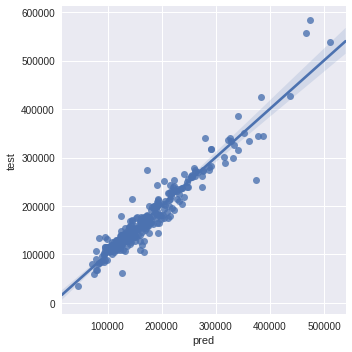

In [317]:
sns.lmplot(data=res, x='pred', y='test')

In [365]:
rf = RandomForestRegressor(n_estimators=100)

In [359]:
rf.fit(X_train_prep, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [360]:
helper.get_featureImportance(X_train_prep.columns.tolist(), rf.feature_importances_)

,importance
OverallQual,5.438502e-01
GrLivArea,1.040011e-01
TotalBsmtSF,4.752867e-02
GarageCars,4.005915e-02
2ndFlrSF,3.830008e-02
1stFlrSF,3.148881e-02
BsmtFinSF1,2.814462e-02
GarageArea,1.355153e-02
LotArea,1.291945e-02
MasVnrArea,9.224525e-03


In [82]:
corr = numPipe.fit_transform(houses).corr()

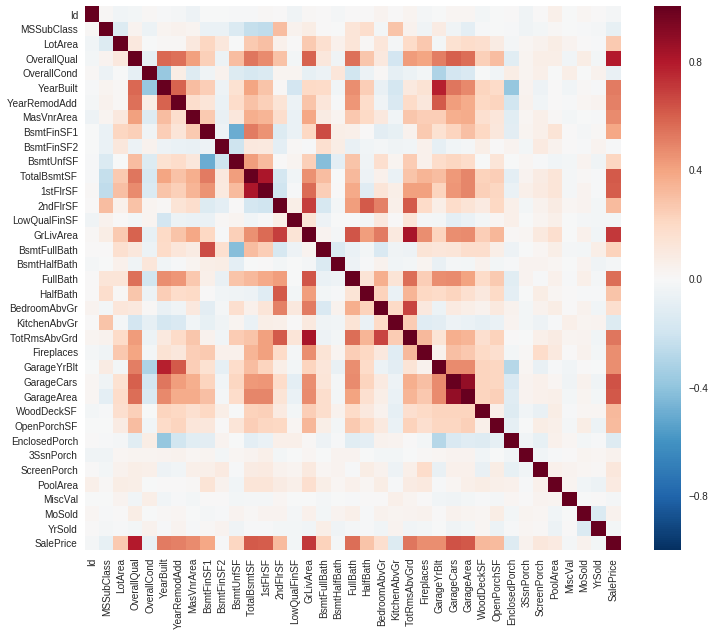

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
sns.heatmap(corr, annot=False)

In [361]:
from sklearn.feature_selection import RFE

In [366]:
rfe = RFE(rf, n_features_to_select=10, step=0.2)

In [367]:
rfe.fit(X_train_prep, y_train)

RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
  n_features_to_select=10, step=0.2, verbose=0)

In [371]:
df = pd.DataFrame({'feature': X_train_prep.columns.tolist(),'ranking': rfe.ranking_})

In [375]:
df.sort_values(by='ranking').head(10)

,feature,ranking
2,LotArea,1
3,OverallQual,1
25,GarageCars,1
5,YearBuilt,1
26,GarageArea,1
15,GrLivArea,1
8,BsmtFinSF1,1
13,2ndFlrSF,1
11,TotalBsmtSF,1
12,1stFlrSF,1


In [377]:
glm.tvalues.sort_values(ascending=False).head(10)

OverallQual         8.295126
GrLivArea           7.303157
OverallCond         6.561761
TotalBsmtSF         6.439809
LotArea             6.122480
2ndFlrSF            5.475914
BsmtFinSF1          5.443016
YearBuilt           5.237152
RoofMatl=WdShngl    3.947661
RoofMatl=Membran    3.633108
dtype: float64